In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("data of house.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [5]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
df['Area']=df['Area'].replace(',','',regex=True)
df['Area']=pd.to_numeric(df['Area'],errors='coerce')
max_area=500
df = df[df['Area']<= max_area]
df=df.dropna(subset=['Address'])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df[['Price','Area']]=scaler.fit_transform(df[['Price','Area']])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,-0.737906,1,True,True,True,Shahran,-0.454139,61666.67
1,-0.791875,1,True,True,True,Shahran,-0.454139,61666.67
2,-0.450069,2,True,True,True,Pardis,-0.629727,18333.33
3,-0.162233,2,True,True,True,Shahrake Qods,-0.582116,30083.33
4,0.341481,2,True,True,True,Shahrake Gharb,0.241462,233333.33
...,...,...,...,...,...,...,...,...
3474,-0.324141,2,True,True,True,Southern Janatabad,-0.231276,116666.67
3475,-0.378110,2,True,True,True,Niavaran,0.214448,226666.67
3476,-0.522028,2,False,False,False,Parand,-0.654715,12166.67
3477,0.017665,2,True,True,True,Dorous,0.052366,186666.67


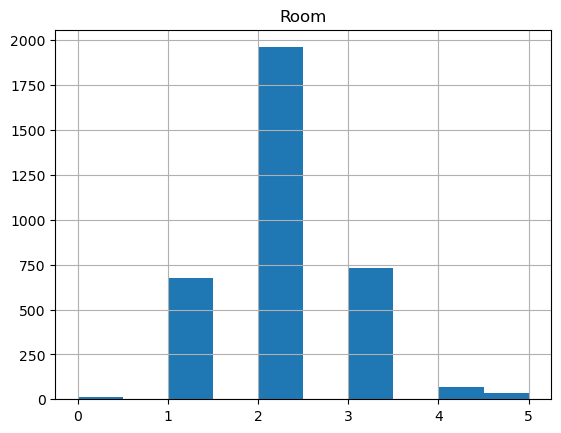

In [17]:
viz = df[['Area','Room']]
viz.hist()
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

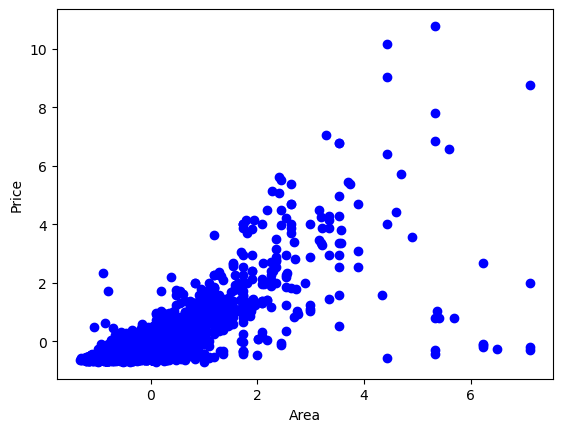

In [11]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -0.73790568,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , -0.79187501,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , -0.45006928,  2.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 1.        , -0.52202838,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.01766488,  2.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , -0.39609995,  2.        , ...,  1.        ,
         1.        ,  1.        ]])

In [47]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 2.10956058e-14 -7.56766204e-01  6.23516265e-01 -2.56292588e-02
   2.66098320e-01 -6.91286678e-01  9.42518134e-02  5.82663072e-01
   8.13757153e-02  4.95616512e-01 -1.41654594e+00  1.34872324e-01
   1.50167833e-01 -2.01320038e-01  7.39962690e-01 -2.56292588e-02
  -5.52713443e-02  2.70626886e-01  2.66098320e-01  2.22814846e-01
  -6.91286678e-01 -2.19469578e-02 -1.44063435e-01  2.07472462e-02
   7.54653764e-02 -6.89706411e-01  1.05663959e-01 -9.94242264e-02
  -4.23413598e-01  1.09509266e+00  8.13757153e-02 -2.08156670e-01
   8.55186774e-01  4.95616512e-01  6.67038497e-01 -1.41654594e+00
  -1.19790718e-01 -9.11527221e-02 -2.73753113e-02 -2.82559515e-01
   1.50167833e-01 -3.40146080e-04 -3.86121130e-01 -2.01320038e-01
  -2.95958357e-01  7.39962690e-01 -2.56292588e-02 -5.52713443e-02
   2.70626886e-01 -5.52713443e-02  1.74874825e-02  2.70626886e-01
   2.66098320e-01  2.22814846e-01  2.22814846e-01 -6.91286678e-01
   4.40077495e-03 -7.48022451e-03  1.83765897e-02 -2.95575426

Text(0, 0.5, 'Price')

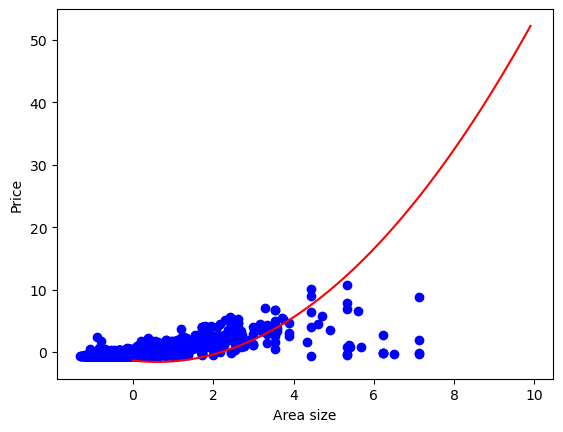

In [53]:
plt.scatter(train.Area, train.Price,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area size")
plt.ylabel("Price")

In [55]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 0.26
Residual sum of squares (MSE): 0.25
R2-score: 0.76
